# GooglePlayStore App Rating Analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('GooglePlayStore.csv')
df.head()

c:\users\dube.000\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device


In [3]:
df.dtypes

App Name           object
Category           object
Rating             object
Reviews            object
Installs           object
Size               object
Price              object
Content Rating     object
Last Updated       object
Minimum Version    object
Latest Version     object
dtype: object

In [4]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
#df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
#df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('Varies with device', '') if 'Varies with device' in str(x) else str(x))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dtypes

App Name            object
Category            object
Rating             float64
Reviews            float64
Installs           float64
Size                object
Price              float64
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
dtype: object

In [5]:
df.shape

(267052, 11)

In [6]:
df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000.0,Varies with device,0.00,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000.0,Varies with device,0.00,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329,1967.0,100000.0,1.4M,0.00,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000.0,16M,0.00,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,10000.0,Varies with device,5.99,Everyone,1-Apr-19,Varies with device,Varies with device


In [109]:
df.isna().sum()

App Name            1
Category            1
Rating             17
Reviews             2
Installs            2
Size                0
Price               2
Content Rating      0
Last Updated        0
Minimum Version     1
Latest Version      3
dtype: int64

#### Data cleanup

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267051 non-null  object 
 1   Category         267051 non-null  object 
 2   Rating           267035 non-null  float64
 3   Reviews          267050 non-null  float64
 4   Installs         267050 non-null  float64
 5   Size             267052 non-null  object 
 6   Price            267050 non-null  float64
 7   Content Rating   267052 non-null  object 
 8   Last Updated     267052 non-null  object 
 9   Minimum Version  267051 non-null  object 
 10  Latest Version   267049 non-null  object 
dtypes: float64(4), object(7)
memory usage: 22.4+ MB


In [9]:
df.isnull().sum()

App Name            1
Category            1
Rating             17
Reviews             2
Installs            2
Size                0
Price               2
Content Rating      0
Last Updated        0
Minimum Version     1
Latest Version      3
dtype: int64

In [41]:
#Check for rating values above 5. All these should be dropped since rating ends at 5 as the max
df[df.Rating > 5]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [42]:
#Check for ratings below 0.
df[df.Rating < 0]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [12]:
#Drop the row with rating above 5. and check if there's any other one existing.
df.drop([99584], inplace=True)
df[df.Rating > 5]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


c:\users\dube.000\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dube.000\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


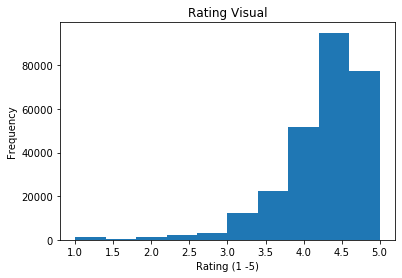

In [14]:
plt.hist(df.Rating)
plt.title('Rating Visual')
plt.xlabel('Rating (1 -5)')
plt.ylabel('Frequency')
plt.show()

### Fill the null values with aggregated values of mean, median or mode
##### I.e.
##### 1. MODE: for categorical values
##### 2. Median: for numerical values of a right skewed dataset
##### 3. Mean: for numerical values of a left skewed dataset

In [15]:
#Define a funcation impute median
def impute_median(series):
    return series.fillna(series.median())

In [27]:
df.Rating = df['Rating'].transform(impute_median)
df.Reviews = df['Reviews'].transform(impute_median)
df.Installs = df['Installs'].transform(impute_median)
df.Price = df['Price'].transform(impute_median)

In [28]:
df.isnull().sum()

App Name           1
Category           1
Rating             0
Reviews            0
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     0
dtype: int64

In [29]:
#Modes of categorical values
print(df['Latest Version'].mode())
print(df['Minimum Version'].mode())
print(df['Size'].mode())

0    1
dtype: object
0    4.1 and up
dtype: object
0    Varies with device
dtype: object


In [35]:
#Fill the missing categorical values wiht the Mode
df['Latest Version'].fillna(str(df['Latest Version'].mode().values[0]), inplace=True)
df['Minimum Version'].fillna(str(df['Minimum Version'].mode().values[0]), inplace=True)
df['App Name'].fillna(str(df['App Name'].mode().values[0]), inplace=True)
df['Category'].fillna(str(df['Category'].mode().values[0]), inplace=True)

df.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            0
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     0
dtype: int64

In [37]:
df.describe()

,Rating,Reviews,Installs,Price
count,267051.000000,2.670510e+05,2.670510e+05,267051.000000
mean,4.269383,1.459572e+04,6.410409e+05,0.237991
std,0.586235,4.110554e+05,2.046759e+07,4.940584
min,1.000000,1.000000e+00,0.000000e+00,0.000000
25%,4.017748,1.600000e+01,1.000000e+03,0.000000
50%,4.382146,9.300000e+01,1.000000e+04,0.000000
75%,4.648649,6.560000e+02,5.000000e+04,0.000000
max,5.000000,8.621429e+07,5.000000e+09,1458.000000


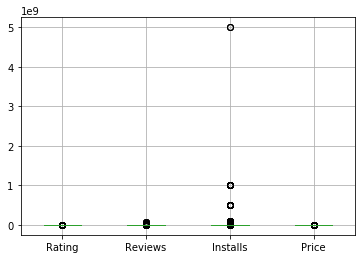

In [40]:
df.boxplot()

### Analysis by Aggregation and Groupby

In [44]:
result1 = df.groupby('Category')['Rating'].agg(np.mean)
result1

Category
 Accounting         4.382146
 Alfabe �?ren       4.382146
 Breaking News      4.382146
 Channel 2 News     4.382146
 ETEA & MDCAT       4.382146
                      ...   
TOOLS               4.142244
TRAVEL              3.928571
TRAVEL_AND_LOCAL    4.130067
VIDEO_PLAYERS       4.053698
WEATHER             4.195190
Name: Rating, Length: 66, dtype: float64

In [45]:
result2 = df.groupby('Category')['Price'].agg(np.sum)
result2

Category
 Accounting         1000.00
 Alfabe �?ren         57.00
 Breaking News         6.90
 Channel 2 News        0.00
 ETEA & MDCAT          6.90
                     ...   
TOOLS               5614.46
TRAVEL                 0.00
TRAVEL_AND_LOCAL     960.18
VIDEO_PLAYERS        599.32
WEATHER              453.48
Name: Price, Length: 66, dtype: float64

In [54]:
result3 = df.groupby('Category')['Reviews'].agg(np.mean)
result3

Category
 Accounting            93.000000
 Alfabe �?ren           5.000000
 Breaking News          4.775641
 Channel 2 News         3.857799
 ETEA & MDCAT           4.504273
                        ...     
TOOLS               17031.189561
TRAVEL                 42.000000
TRAVEL_AND_LOCAL     7475.082870
VIDEO_PLAYERS       43090.644829
WEATHER             16237.905660
Name: Reviews, Length: 66, dtype: float64

In [55]:
result4 = df.groupby('Category')['Installs'].agg(np.mean)
result4

Category
 Accounting         4.823529e+00
 Alfabe �?ren       1.000000e+00
 Breaking News      1.560000e+02
 Channel 2 News     1.197600e+04
 ETEA & MDCAT       1.170000e+02
                        ...     
TOOLS               1.104252e+06
TRAVEL              1.000000e+04
TRAVEL_AND_LOCAL    1.223133e+06
VIDEO_PLAYERS       3.554788e+06
WEATHER             5.188793e+05
Name: Installs, Length: 66, dtype: float64

### Data Visualization

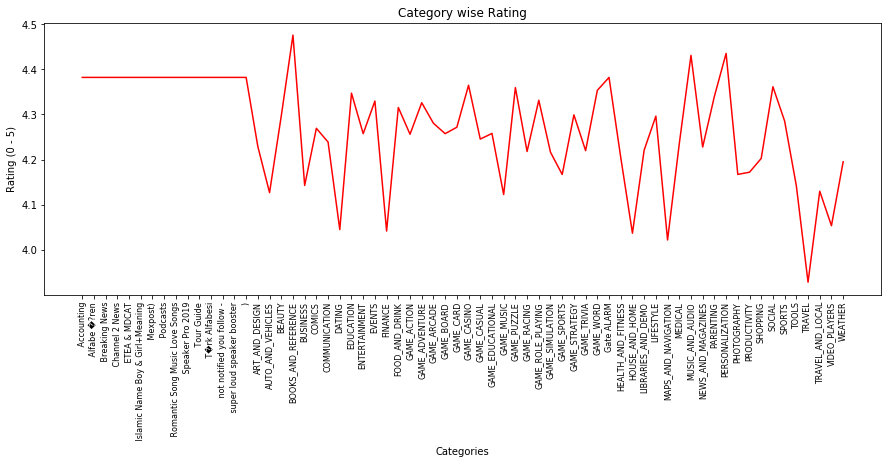

In [49]:
plt.figure(figsize=(15,5))
plt.plot(result1, color='r')
plt.xticks(result1.index, rotation=90, size=8)
plt.xlabel('Categories')
plt.ylabel('Rating (0 - 5)')
plt.title('Category wise Rating')
plt.show()

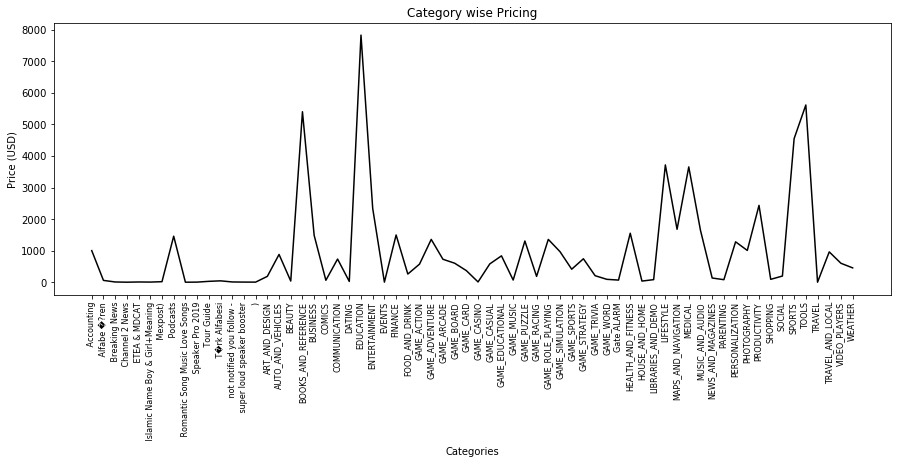

In [58]:
plt.figure(figsize=(15,5))
plt.plot(result2, color='k')
plt.xticks(result2.index, rotation=90, size=8)
plt.xlabel('Categories')
plt.ylabel('Price (USD)')
plt.title('Category wise Pricing')
plt.show()

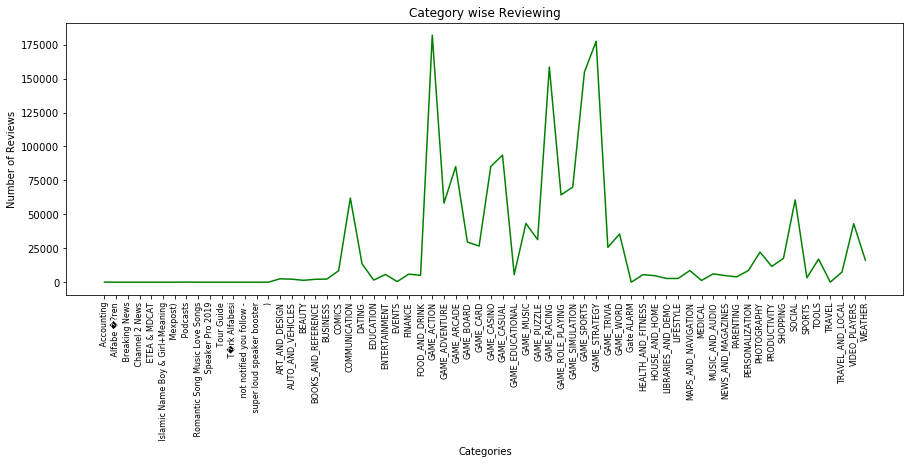

In [59]:
plt.figure(figsize=(15,5))
plt.plot(result3, color='g')
plt.xticks(result3.index, rotation=90, size=8)
plt.xlabel('Categories')
plt.ylabel('Number of Reviews')
plt.title('Category wise Reviewing')
plt.show()

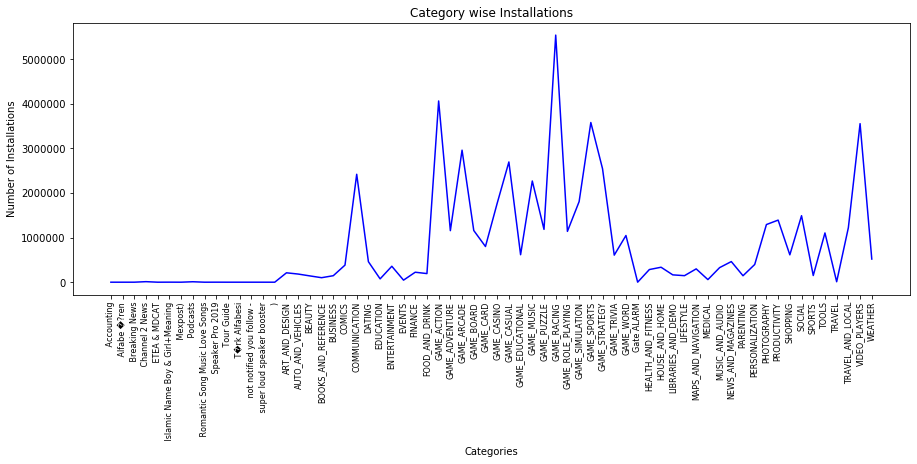

In [60]:
plt.figure(figsize=(15,5))
plt.plot(result4, color='b')
plt.xticks(result4.index, rotation=90, size=8)
plt.xlabel('Categories')
plt.ylabel('Number of Installations')
plt.title('Category wise Installations')
plt.show()